# Three bumps from HDF5
Here we will try to load the database from HDF5 and show the contents of it. So first let's open it

In [1]:
import h5py
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

sns.set(font_scale=2)

from ipywidgets import interact

# Plot inline
%matplotlib inline

# Add the proper path
import sys
sys.path.append("../")

from signals.aux_functions import gaussian_bump
import nexa.loading as load
from visualization.sensors import visualize_SLM_hdf5
from visualization.sensors import visualize_STDM_hdf5
from visualization.sensor_clustering import visualize_cluster_matrix_hdf5

### Load the database and the general parameters

In [2]:
location = '../results_database/three_bumps_distance.hdf5'
database = h5py.File(location, 'r')

In [3]:
# Time 
Tmax = 1000
dt = 1.0
time = np.arange(0, Tmax, dt)

# Parameters that the bumpbs share
max_rate = 100
base = 10
value = 50
attenuation = 2

### Now construct the functions for the visualizations

In [4]:
def signals_and_SLM(center1, center3):
    # Define three arangments for the values of the gaussian bumpbs
    center1 = center1
    center2 = 500
    center3 = center3

    # Now create the guassian bumps
    gb1 = gaussian_bump(time, center1, 0.5 * max_rate, base, value, attenuation)
    gb2 = gaussian_bump(time, center2, max_rate, base, value * 2 , attenuation)
    gb3 = gaussian_bump(time, center3, max_rate, base, value * 0.5, attenuation)
    
    # Database extraction
    run_name = str(center1) + '-'
    run_name += str(center2) + '-'
    run_name += str(center3)
    
    print('run name', run_name)

    nexa_arrangement = '3-4-3'
    r = database[run_name]
    
    # Plot signals and SLM
    
    fig = plt.figure(figsize=(16, 12))
    gs = gridspec.GridSpec(3, 2)

    ax1 = fig.add_subplot(gs[0, 0])
    ax1.plot(time, gb1, 'r', label='signal 1')
    ax1.legend(loc='best')
    ax1.set_ylim(0, 100)
    
    ax2 = fig.add_subplot(gs[1, 0])
    ax2.plot(time, gb2, 'b', label='signal 2')
    ax2.legend(loc='best')
    
    ax3 = fig.add_subplot(gs[2, 0])
    ax3.plot(time, gb3, 'g', label='signal 3')
    ax3.legend(loc='best')

    ax4 = fig.add_subplot(gs[:, 1])
    visualize_SLM_hdf5(database, run_name, ax=ax4)

    plt.show()

    

In [5]:
def signals_and_clustering(center1, center3):
    # Define three arangments for the values of the gaussian bumpbs
    center1 = center1
    center2 = 500
    center3 = center3

    # Now create the guassian bumps
    gb1 = gaussian_bump(time, center1, 0.5 * max_rate, base, value, attenuation)
    gb2 = gaussian_bump(time, center2, max_rate, base, value * 2, attenuation)
    gb3 = gaussian_bump(time, center3, max_rate, base, value * 0.5, attenuation)
    
    # Database extraction
    run_name = str(center1) + '-'
    run_name += str(center2) + '-'
    run_name += str(center3)
    
    print('run name', run_name)

    nexa_arrangement = '3-4-3'
    r = database[run_name]
    
    # Plot signals and SLM
    
    fig = plt.figure(figsize=(16, 12))
    gs = gridspec.GridSpec(3, 2)

    ax1 = fig.add_subplot(gs[0, 0])
    ax1.plot(time, gb1, 'r', label='signal 1')
    ax1.legend(loc='best')
    ax1.set_ylim(0, 100)
    
    ax2 = fig.add_subplot(gs[1, 0])
    ax2.plot(time, gb2, 'b', label='signal 2')
    ax2.legend(loc='best')
    
    ax3 = fig.add_subplot(gs[2, 0])
    ax3.plot(time, gb3, 'g', label='signal 3')
    ax3.legend(loc='best')

    ax4 = fig.add_subplot(gs[:, 1])
    visualize_cluster_matrix_hdf5(database, run_name, nexa_arrangement, ax=ax4)   

    plt.show()

    

In [9]:
def signals_and_STDM(center1, center3):
    # Define three arangments for the values of the gaussian bumpbs
    center1 = center1
    center2 = 500
    center3 = center3

    # Now create the guassian bumps
    gb1 = gaussian_bump(time, center1, 0.5 * max_rate, base, value, attenuation)
    gb2 = gaussian_bump(time, center2, max_rate, base, value * 2, attenuation)
    gb3 = gaussian_bump(time, center3, max_rate, base, value * 0.5, attenuation)
    
    # Database extraction
    run_name = str(center1) + '-'
    run_name += str(center2) + '-'
    run_name += str(center3)
    
    print('run name', run_name)

    nexa_arrangement = '3-4-3'
    r = database[run_name]
    
    # Plot signals and SLM
    
    fig = plt.figure(figsize=(16, 12))
    gs = gridspec.GridSpec(3, 2)

    ax1 = fig.add_subplot(gs[0, 0])
    ax1.plot(time, gb1, 'r', label='signal 1')
    ax1.set_ylim(0, 100)
    ax1.legend(loc='best')
    
    ax2 = fig.add_subplot(gs[1, 0])
    ax2.plot(time, gb2, 'b', label='signal 2')
    ax2.legend(loc='best')
    
    ax3 = fig.add_subplot(gs[2, 0])
    ax3.plot(time, gb3, 'g', label='signal 3')
    ax3.legend(loc='best')

    ax4 = fig.add_subplot(gs[:, 1])
    ax4 = visualize_STDM_hdf5(database, run_name, nexa_arrangement, ax=ax4)
    ax4.yaxis.set_major_formatter(plt.FixedFormatter(['A', 'B', 'C', 'D']))

    plt.show()
    

run name 300-500-700


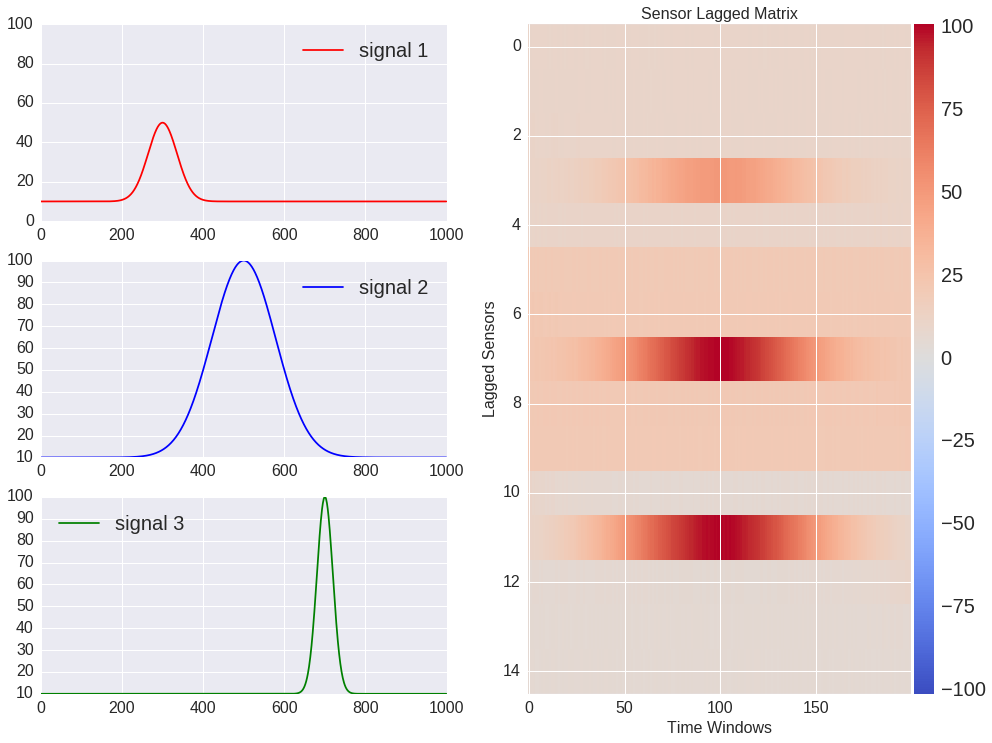

<function __main__.signals_and_SLM>

In [10]:
interact(signals_and_SLM, center1=(100, 500, 100), center3=(500, 900, 100))

run name 300-500-700


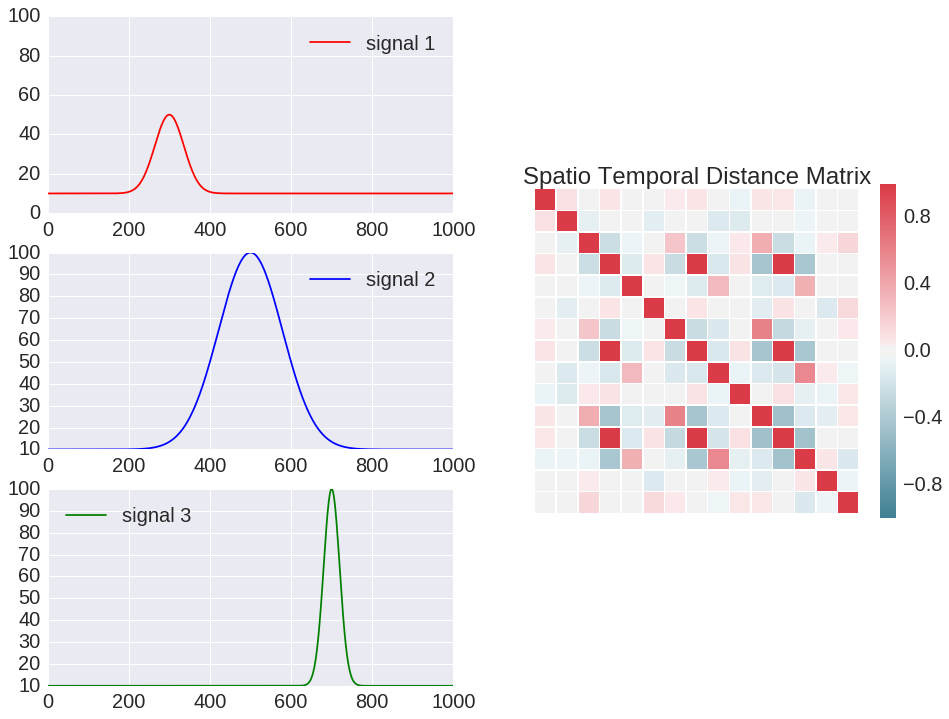

<function __main__.signals_and_STDM>

In [11]:
interact(signals_and_STDM, center1=(100, 500, 100), center3=(500, 900, 100))

run name 300-500-700


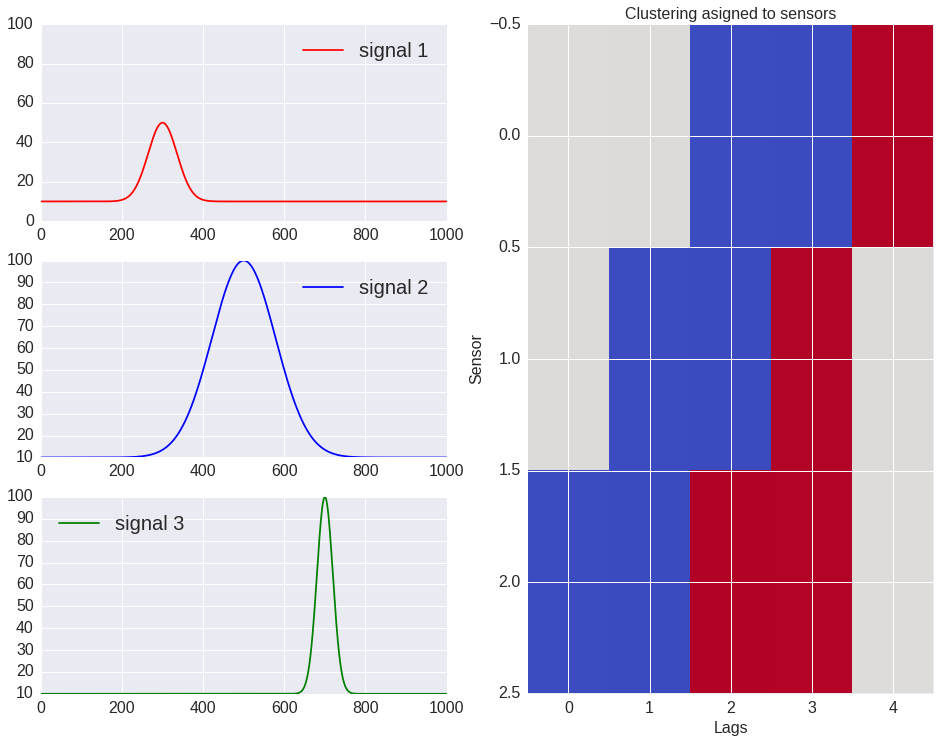

<function __main__.signals_and_clustering>

In [12]:
interact(signals_and_clustering, center1=(100, 500, 100), center3=(500, 900, 100))